## Assignment 2, part 2 of 2

Please **show your work** - i.e., show and explain your code/math, and write your reasoning.

Questions 1-4 are pen-and-paper exercises.

1. **[0.5 marks]** Consider a dataset $\mathcal{D}$ that contains only two observations $\mathbf{x}_{1} = (1, -1)$ and $\mathbf{x}_2 = (-1, 1)$. Suppose that the class of the first observation is $y_1 = 0$ and that the class of the second observation is $y_2 = 1$. How would a 1-nearest neighbour classifier based on the Euclidean distance classify the observation $\mathbf{x} = (2, -3)$? What are the distances between this new observation and each observation in the dataset?
1. **[0.5 marks]** Consider a dataset $\mathcal{D}$ that only contains observations of two different classes. Explain why a $k$-nearest neighbour classifier does not need a tie-breaking policy when $k$ is odd.
1. **[0.5 marks]**  Consider a classifier tasked with predicting whether a medical test is positive. Suppose that this classifier has precision $1.0$ and recall $0.25$ on a test dataset. Should we trust the output of this classifier?
1. **[0.5 marks]**  Based on the confusion matrix shown in this lab notebook, what is the pair of classes that is most confusing for the $1$-nearest neighbour classifier trained in the previous sections?
1. **[1 marks]** Train a support vector machine classifier using the same (subsampled) training dataset used in the previous sections and compute its accuracy on the corresponding test dataset. You can use the default hyperparameters for the class ``SVC`` from ``sklearn.svm``.
1. **[1 marks]**  Using the same (subsampled) training dataset used in the previous sections, employ ``GridSearchCV`` to find the best hyperparameter settings based on 5-fold cross-validation for a ``RandomForestClassifier``. Consider ``n_estimators`` $ \in \{ 1, 2, 4, 8, 16, 32\}$ and ``max_features`` $ \in \{0.1, 0.25\}$. Use the default values for the remaining hyperparameters. Compute the accuracy of the best model on the corresponding test dataset. Show the code in the report.
1. **[1 mark]** Use tSNE to obtain a 2D embedding of the data points. Train a decision tree on this 2D dataset and produce a 2D region classification plot: each class in the dataset must be assigned a distinct colour; each pixel in the plot must be of the colour corresponding to the class predicted for a data point in that location. Do the same, but using a support vector machine instead of a decision tree.

In [ ]:
# Configure the appearance of ``seaborn`` graphics in this notebook
%config InlineBackend.figure_formats = set(['retina'])

import gzip
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Selecting the training data from the original dataset
f = gzip.open('data/mnist.pkl.gz', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]


[1 marks] Train a support vector machine classifier using the same (subsampled) training dataset used in the previous sections and compute its accuracy on the corresponding test dataset. You can use the default hyperparameters for the class SVC from sklearn.svm.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn import svm
svm_classifier = svm.SVC(decision_function_shape='ovo')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_pipe = make_pipeline(StandardScaler(), svm_classifier)

svm_pipe.fit(X_train, y_train)
svm_pipe.score(X_test, y_test)

0.865

[1 marks] Using the same (subsampled) training dataset used in the previous sections, employ GridSearchCV to find the best hyperparameter settings based on 5-fold cross-validation for a RandomForestClassifier. Consider n_estimators ∈{1,2,4,8,16,32} and max_features ∈{0.1,0.25}. Use the default values for the remaining hyperparameters. Compute the accuracy of the best model on the corresponding test dataset. Show the code in the report.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [1,2,4,8,16,32], 'max_features':[0.1,0.25]}

random_forest = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest, parameters, cv=5)
random_forest_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(random_forest_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(random_forest_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(random_forest_cv.score(X_test, y_test)))

Best hyperparameter setting: RandomForestClassifier(max_features=0.1, n_estimators=32).
Average accuracy across folds of best hyperparameter setting: 0.8956250000000001.
Test dataset accuracy of best hyperparameter setting: 0.89.


[1 mark] Use tSNE to obtain a 2D embedding of the data points. Train a decision tree on this 2D dataset and produce a 2D region classification plot: each class in the dataset must be assigned a distinct colour; each pixel in the plot must be of the colour corresponding to the class predicted for a data point in that location. Do the same, but using a support vector machine instead of a decision tree.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


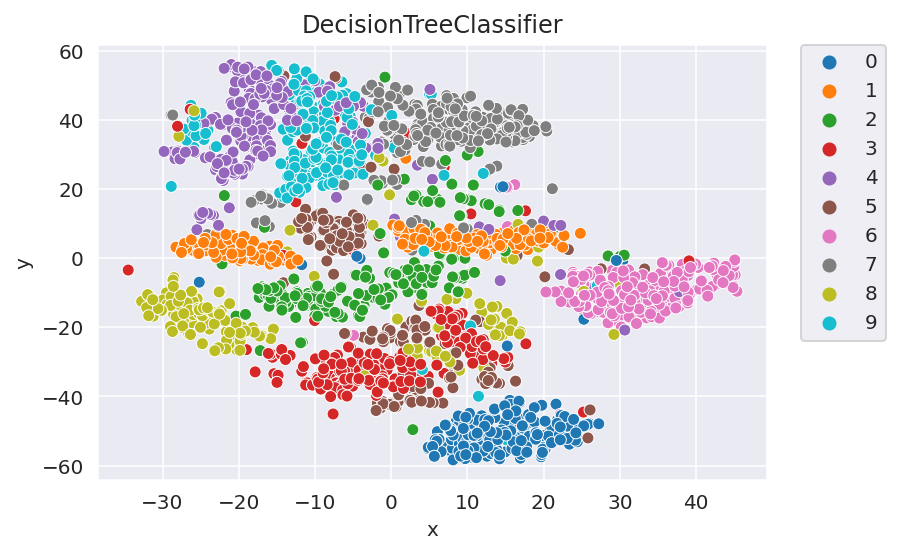

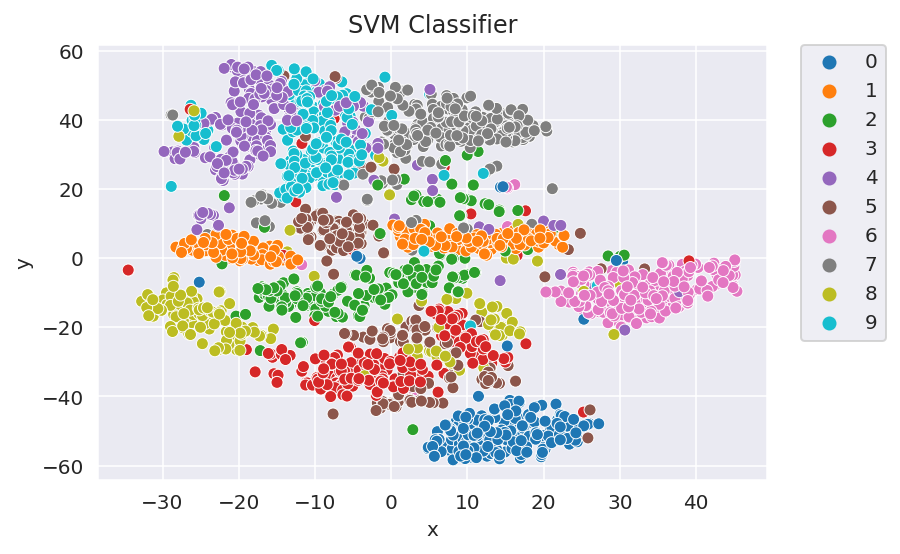

In [ ]:
from sklearn.manifold import TSNE

# Computing a projection using t-stochastic neighbour embedding
embedding = TSNE(n_components=2, perplexity=50, random_state=0)
Xp = embedding.fit_transform(X)

from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls.fit(X, y)
y_predicts = cls.predict(X)

# Plotting projection colored by classes
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1], 'class': y_predicts})
sns.scatterplot(x='x', y='y', hue='class', palette=sns.color_palette(), data=df_projection)
plt.title('DecisionTreeClassifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

from sklearn.svm import SVC
cls = SVC()
cls.fit(X, y)
y_predicts = cls.predict(X)

# Plotting projection colored by classes
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1], 'class': y_predicts})
sns.scatterplot(x='x', y='y', hue='class', palette=sns.color_palette(), data=df_projection)
plt.title('SVM Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()